# Eigenvalues of Chebyshev differentiation matrix

Apply Dirichlet bc at $x=1$, then we remove last column and last row of differentiation matrix.

In [16]:
%config InlineBackend.figure_format='svg'
from pylab import *
from chebPy import *

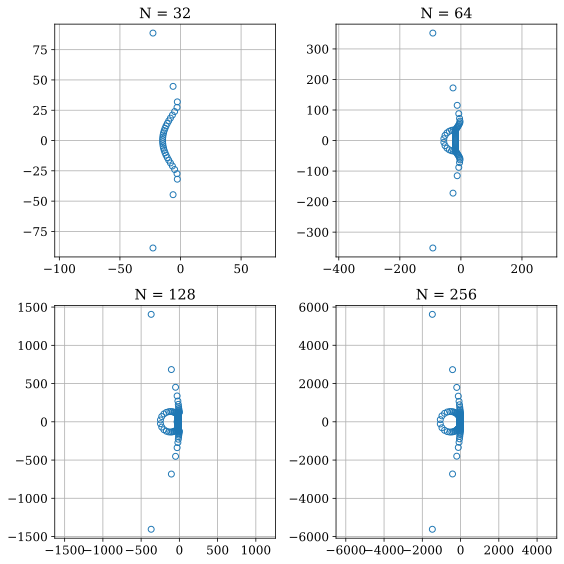

In [17]:
figure(figsize=(8,8))
Nvalues = array([32,64,128,256])
lmax = []
for i in range(4):
    N = Nvalues[i]
    D, x = cheb(N)
    D = D[0:-1,0:-1]
    
    lam,_ = eig(D)
    lmax.append(abs(lam).max())
    subplot(2,2,i+1)
    plot(real(lam),imag(lam),"o")
    grid(True),axis("equal"),title("N = "+str(N))

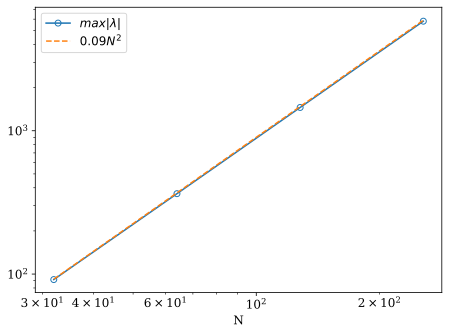

In [18]:
loglog(Nvalues,lmax,"o-",label="$max|\\lambda|$")
loglog(Nvalues,0.09*Nvalues**2,'--',label="$0.09 N^2$")
legend(), xlabel("N");

This shows that

$$
\max_i |\lambda_i| = 0.09 N^2
$$

All the eigenvalues have non-positive real parts.

## 3rd order Adams-Bashforth method

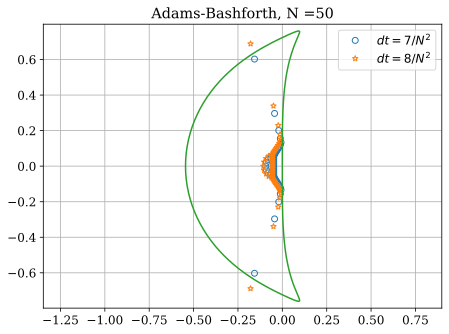

In [19]:
N = 50
D, x = cheb(N)
D = D[0:-1,0:-1]
lam,_ = eig(D)

dt = 7/N**2
plot(real(lam*dt),imag(lam*dt),"o",label="$dt=7/N^2$")

dt = 8/N**2
plot(real(lam*dt),imag(lam*dt),"*",label="$dt=8/N^2$")

# Adams-Bashforth
z = exp(1j*pi*arange(0,201)/100); r = z - 1
s = (23 - 16/z + 5/z**2)/12; rr = r/s; plot(real(rr),imag(rr))
axis('equal'); grid('on')
title('Adams-Bashforth, N ='+str(N)), legend();

For $\Delta t = 7/N^2$, all the values $\lambda\Delta t$ lie inside the stability domain of this Adams method. For $\Delta t = 8/N^2$, some values are outside the stable region.